In [46]:
import csv
import cv2
import numpy as np
import gc

LOG_PATHS = ["data/2laps/"]

#parameters to tune
correction = 0.22
crop_top = 100
crop_bottom = 25
crop_left = 0
crop_right = 0

#read file

images = []
mesurements = []

In [47]:
for path in LOG_PATHS:
    with open(path + "driving_log.csv") as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            image_c = cv2.imread(path + line[0])
            image_l = cv2.imread(path + line[1])
            image_r = cv2.imread(path + line[2])
            
            mesurement_c = float(line[3]) * 1.1
            
            if(image_c != None):
                images.append(image_c)
                mesurements.append(mesurement_c)
                
            if(image_l != None):
                mesurement_l = mesurement_c + correction
                images.append(image_l)
                mesurements.append(mesurement_l)
                
            if(image_r != None):
                mesurement_r = mesurement_c - correction
                images.append(image_r)
                mesurements.append(mesurement_r)
                
            #images.append(cv2.flip(image_c, 1))
            #mesurements.append(-mesurement_c)
        #endfor
    #endwith
#endfor

/home/falreis/miniconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/falreis/miniconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  # This is added back by InteractiveShellApp.init_path()
/home/falreis/miniconda2/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app


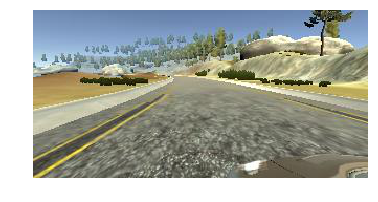

In [54]:
import matplotlib.pyplot as plt

image = cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(image)
plt.show()

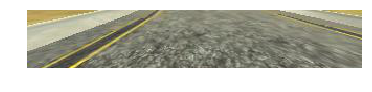

In [55]:
crop_img = image[80:135, 0:320] # Crop from x, y, w, h -> 100, 200, 300, 400
# NOTE: its img[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]
plt.axis("off")
plt.imshow(crop_img)
plt.show()

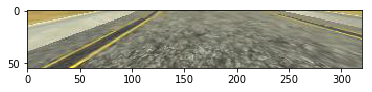

In [57]:
im = crop_img.copy()
'''
for x in range(0,100):
    for y in range(0,20):
        if (5*y-x) <= 0:
            im[y:y+1, x:x+1] = [0, 0, 0]
            im[y:y+1, (220+x):(220+x+1)] = [0, 0, 0]
'''     
plt.imshow(im)
plt.show()